Task: Process SEP measurements from NOAA satellites (GOES11 and GOES13). Calculates average and maximum differential/integral spectra, peak times, specific energy fluxes, NOAA S-scale categorization, and correlates with solar disk data.

In [3]:
from google.colab import files
uploaded = files.upload()  # This will open a file picker

Saving SEP_H_GOES11.txt to SEP_H_GOES11.txt
Saving SEP_H_GOES13.txt to SEP_H_GOES13.txt


In [5]:
import os
print(os.listdir('.'))  # This will show all files in the current directory

['.config', 'SEP_H_GOES13.txt', 'SEP_H_GOES11.txt', 'sample_data']


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline
from datetime import datetime

# Set plot styles
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

# Energy channels (MeV)
energy = np.array([6.643, 12.61, 20.55, 46.62, 103.7, 154.6])  # Matches your data

# Load data function
def load_data(file_path):
    try:
            colnames = ['epoch', 'FPDO_1', 'FPDO_2', 'FPDO_3', 'FPDO_4', 'FPDO_5', 'FPDO_6']
            df = pd.read_csv(file_path, sep=',', skiprows=1, names=colnames, header=None)
            df['epoch'] = pd.to_datetime(df['epoch'])
            df = df.set_index('epoch')  # Set epoch as index
            return df
    except FileNotFoundError:
            print(f"Error: File {file_path} not found.")
            return None

              # Load both datasets
goes13 = load_data('SEP_H_GOES13.txt')
goes11 = load_data('SEP_H_GOES11.txt')

if goes13 is not None and goes11 is not None:
  # Define the date range for processing (adjust as needed; this matches your original code)
      start_date = '2010-05-01'  # Example; use a range that exists in both datasets
      end_date = '2011-02-27'

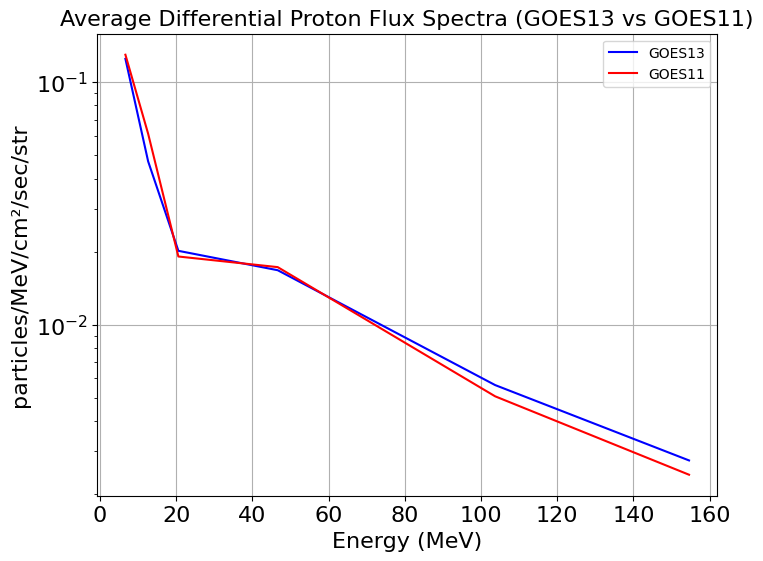

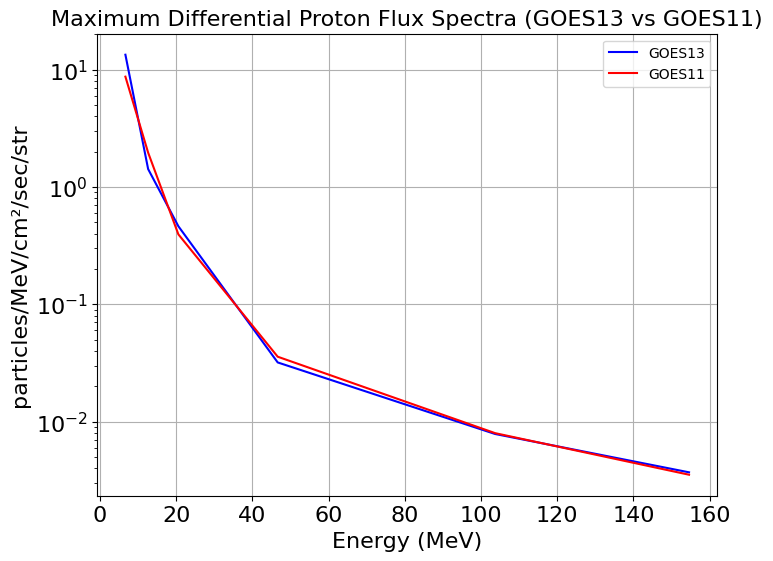

In [25]:
# 1. Calculate and Plot Average and Maximum Differential Spectra for both
avg_spectrum_13 = goes13.loc[start_date:end_date].mean()
max_spectrum_13 = goes13.loc[start_date:end_date].max()

avg_spectrum_11 = goes11.loc[start_date:end_date].mean()
max_spectrum_11 = goes11.loc[start_date:end_date].max()


plt.figure(figsize=(8, 6))
plt.plot(energy, avg_spectrum_13, color='b', label='GOES13')
plt.plot(energy, avg_spectrum_11, color='r', label='GOES11')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.ylabel('particles/MeV/cm²/sec/str')
plt.xlabel('Energy (MeV)')
plt.title('Average Differential Proton Flux Spectra (GOES13 vs GOES11)')
plt.yscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(energy, max_spectrum_13, color='b', label='GOES13')
plt.plot(energy, max_spectrum_11, color='r', label='GOES11')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.ylabel('particles/MeV/cm²/sec/str')
plt.xlabel('Energy (MeV)')
plt.title('Maximum Differential Proton Flux Spectra (GOES13 vs GOES11)')
plt.yscale('log')
plt.legend()
plt.show()

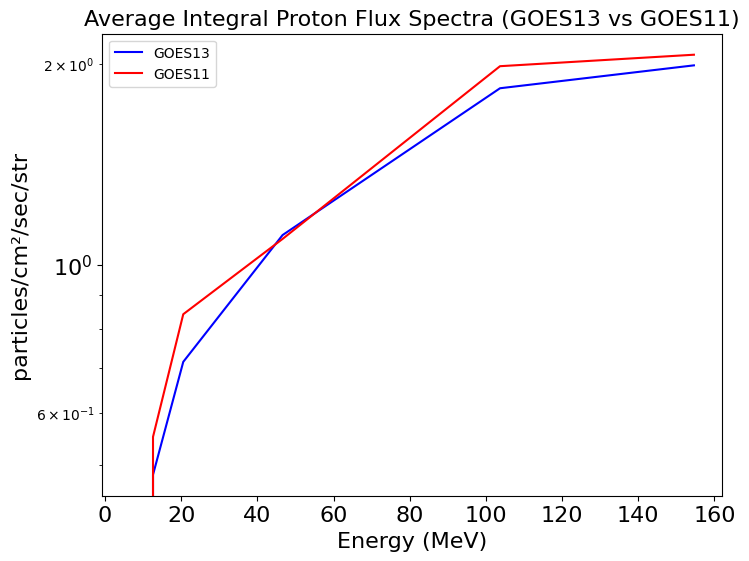

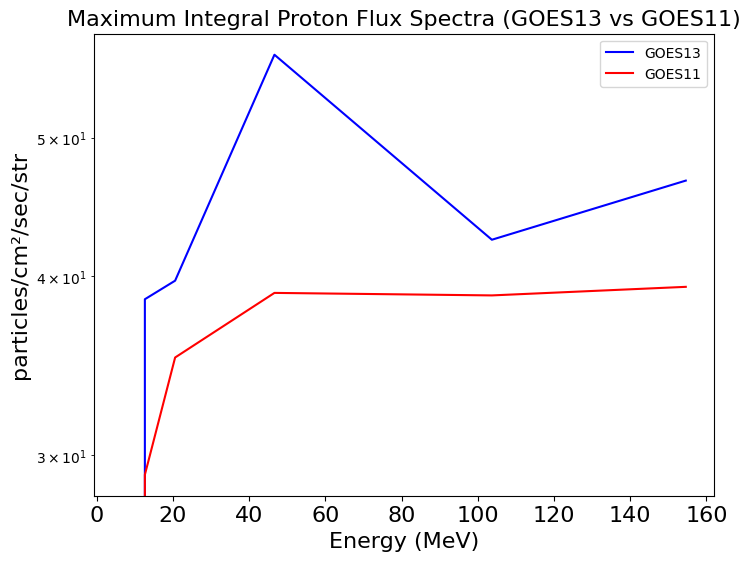

In [24]:
# 2. Interpolate and Calculate Integral Spectra for both
def compute_integral_spectrum(differential_spectrum):
  f = InterpolatedUnivariateSpline(energy, differential_spectrum, k=2)
  integral_values = [f.integral(energy[0], t) for t in energy]
  return integral_values

avg_integral_spectrum_13 = compute_integral_spectrum(avg_spectrum_13)
max_integral_spectrum_13 = compute_integral_spectrum(max_spectrum_13)

avg_integral_spectrum_11 = compute_integral_spectrum(avg_spectrum_11)
max_integral_spectrum_11 = compute_integral_spectrum(max_spectrum_11)

plt.figure(figsize=(8, 6))
plt.plot(energy, avg_integral_spectrum_13, color='b', label='GOES13')
plt.plot(energy, avg_integral_spectrum_11, color='r', label='GOES11')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('particles/cm²/sec/str')
plt.xlabel('Energy (MeV)')
plt.title('Average Integral Proton Flux Spectra (GOES13 vs GOES11)')
plt.yscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(energy, max_integral_spectrum_13, color='b', label='GOES13')
plt.plot(energy, max_integral_spectrum_11, color='r', label='GOES11')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('particles/cm²/sec/str')
plt.xlabel('Energy (MeV)')
plt.title('Maximum Integral Proton Flux Spectra (GOES13 vs GOES11)')
plt.yscale('log')
plt.legend()
plt.show()

In [19]:
# 3. Calculations for Specific Energies (E > 10 MeV, E > 30 MeV, E > 80 MeV) for both
def integral_above_energy(differential_spectrum, threshold_energy, max_energy=154.6):
  f = InterpolatedUnivariateSpline(energy, differential_spectrum, k=2)
  return f.integral(threshold_energy, max_energy)

# For GOES13
avg_above_10_13 = integral_above_energy(avg_spectrum_13, 10)
avg_above_30_13 = integral_above_energy(avg_spectrum_13, 30)
avg_above_80_13 = integral_above_energy(avg_spectrum_13, 80)

max_above_10_13 = integral_above_energy(max_spectrum_13, 10)
max_above_30_13 = integral_above_energy(max_spectrum_13, 30)
max_above_80_13 = integral_above_energy(max_spectrum_13, 80)

# For GOES11 (New)
avg_above_10_11 = integral_above_energy(avg_spectrum_11, 10)
avg_above_30_11 = integral_above_energy(avg_spectrum_11, 30)
avg_above_80_11 = integral_above_energy(avg_spectrum_11, 80)

max_above_10_11 = integral_above_energy(max_spectrum_11, 10)
max_above_30_11 = integral_above_energy(max_spectrum_11, 30)
max_above_80_11 = integral_above_energy(max_spectrum_11, 80)

print("GOES13 Average Integral Flux Above Energies:")
print(f"E > 10 MeV: {avg_above_10_13} particles/cm²/sec/str")
print(f"E > 30 MeV: {avg_above_30_13} particles/cm²/sec/str")
print(f"E > 80 MeV: {avg_above_80_13} particles/cm²/sec/str")

print("\nGOES13 Maximum Integral Flux Above Energies:")
print(f"E > 10 MeV: {max_above_10_13} particles/cm²/sec/str")
print(f"E > 30 MeV: {max_above_30_13} particles/cm²/sec/str")
print(f"E > 80 MeV: {max_above_80_13} particles/cm²/sec/str")

print("\nGOES11 Average Integral Flux Above Energies:")  # New
print(f"E > 10 MeV: {avg_above_10_11} particles/cm²/sec/str")
print(f"E > 30 MeV: {avg_above_30_11} particles/cm²/sec/str")
print(f"E > 80 MeV: {avg_above_80_11} particles/cm²/sec/str")

print("\nGOES11 Maximum Integral Flux Above Energies:")  # New
print(f"E > 10 MeV: {max_above_10_11} particles/cm²/sec/str")
print(f"E > 30 MeV: {max_above_30_11} particles/cm²/sec/str")
print(f"E > 80 MeV: {max_above_80_11} particles/cm²/sec/str")

GOES13 Average Integral Flux Above Energies:
E > 10 MeV: 1.6628536024747942 particles/cm²/sec/str
E > 30 MeV: 1.1297788914409748 particles/cm²/sec/str
E > 80 MeV: 0.35362599344791756 particles/cm²/sec/str

GOES13 Maximum Integral Flux Above Energies:
E > 10 MeV: 16.363232643706205 particles/cm²/sec/str
E > 30 MeV: -1.4514350812564087 particles/cm²/sec/str
E > 80 MeV: 1.0846541616571683 particles/cm²/sec/str

GOES11 Average Integral Flux Above Energies:
E > 10 MeV: 1.7057115781092442 particles/cm²/sec/str
E > 30 MeV: 1.141766191781838 particles/cm²/sec/str
E > 80 MeV: 0.3084520243473524 particles/cm²/sec/str

GOES11 Maximum Integral Flux Above Energies:
E > 10 MeV: 18.114185517576132 particles/cm²/sec/str
E > 30 MeV: 1.7931365311836156 particles/cm²/sec/str
E > 80 MeV: 0.5418206436163837 particles/cm²/sec/str


In [20]:
# 4. Peak Appearance Times for both
def find_peak_times(df):
    peaks = {}
    for channel in ['FPDO_1', 'FPDO_2', 'FPDO_3', 'FPDO_4', 'FPDO_5', 'FPDO_6']:
        temp_df = df.reset_index()
        peak_row = temp_df.loc[temp_df[channel].idxmax()]
        peaks[channel] = {
        'value': peak_row[channel],
        'time': peak_row['epoch']
         }
        print(f"{df.name} {channel} Max: {peaks[channel]['value']} particles/MeV/cm²/sec/str at Time: {peaks[channel]['time']}")
    return peaks  # Optional, for further use

goes13.name = 'GOES13'  # Set a name for the DataFrame
print("GOES13 Peak Appearance Times:")
peaks_13 = find_peak_times(goes13)

goes11.name = 'GOES11'  # Set a name for the DataFrame
print("\nGOES11 Peak Appearance Times:")  # New
peaks_11 = find_peak_times(goes11)

GOES13 Peak Appearance Times:
GOES13 FPDO_1 Max: 3660.0 particles/MeV/cm²/sec/str at Time: 2012-03-08 11:15:00
GOES13 FPDO_2 Max: 773.0 particles/MeV/cm²/sec/str at Time: 2012-03-08 11:15:00
GOES13 FPDO_3 Max: 177.0 particles/MeV/cm²/sec/str at Time: 2012-01-24 15:30:00
GOES13 FPDO_4 Max: 10.8 particles/MeV/cm²/sec/str at Time: 2012-03-07 15:25:00
GOES13 FPDO_5 Max: 0.721 particles/MeV/cm²/sec/str at Time: 2012-03-07 15:25:00
GOES13 FPDO_6 Max: 0.165 particles/MeV/cm²/sec/str at Time: 2017-09-10 22:15:00

GOES11 Peak Appearance Times:
GOES11 FPDO_1 Max: 9080.0 particles/MeV/cm²/sec/str at Time: 2003-10-29 06:15:00
GOES11 FPDO_2 Max: 2200.0 particles/MeV/cm²/sec/str at Time: 2003-10-29 06:10:00
GOES11 FPDO_3 Max: 918.0 particles/MeV/cm²/sec/str at Time: 2003-10-29 06:15:00
GOES11 FPDO_4 Max: 84.1 particles/MeV/cm²/sec/str at Time: 2003-10-29 02:40:00
GOES11 FPDO_5 Max: 6.82 particles/MeV/cm²/sec/str at Time: 2005-01-20 07:10:00
GOES11 FPDO_6 Max: 2.91 particles/MeV/cm²/sec/str at Time: 

In [21]:
# 5. NOAA S-Scale Categorization for both
def noaa_category(flux_above_10):
    if flux_above_10 > 10000:
       return "S5 (Extreme)"
    elif flux_above_10 > 1000:
       return "S4 (Severe)"
    elif flux_above_10 > 100:
       return "S3 (Strong)"
    elif flux_above_10 > 10:
        return "S2 (Moderate)"
    elif flux_above_10 > 1:
      return "S1 (Minor)"
    else:
       return "Below S1"

noaa_cat_13 = noaa_category(max_above_10_13)
print(f"\nGOES13 NOAA S-Scale Category for >10 MeV protons: {noaa_cat_13}")

noaa_cat_11 = noaa_category(max_above_10_11)  # New
print(f"\nGOES11 NOAA S-Scale Category for >10 MeV protons: {noaa_cat_11}")


GOES13 NOAA S-Scale Category for >10 MeV protons: S2 (Moderate)

GOES11 NOAA S-Scale Category for >10 MeV protons: S2 (Moderate)


Pearson correlation: 0.0470630638857849
Spearman rank correlation: 0.025858897801018608 with p-value: 0.9023484343841848
The correlation is weak.


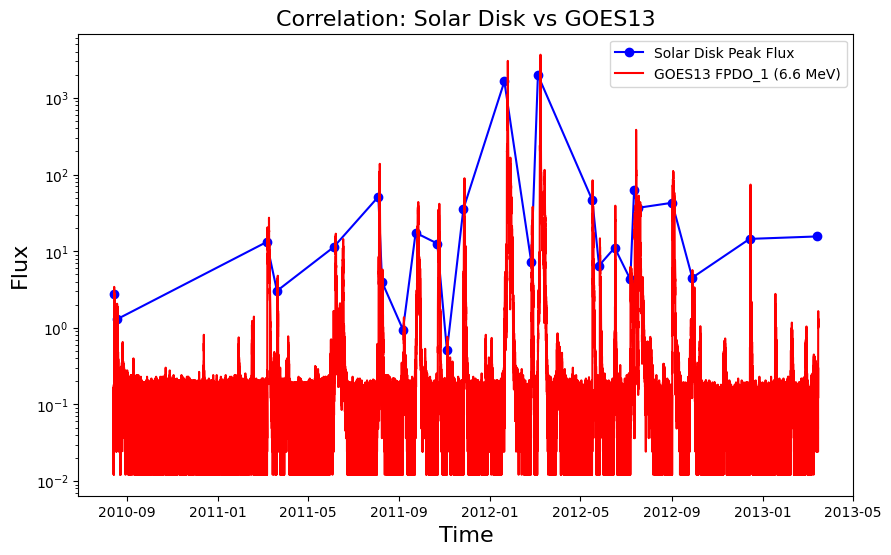

In [38]:
# 6. Correlation with Solar Disk Measurements for GOES13 (focusing on peak times)
sun_disk_data = pd.DataFrame({
'Start Time': ['2010-08-14', '2010-08-18', '2011-03-07', '2011-03-21', '2011-06-05',
'2011-08-04', '2011-08-09', '2011-09-06', '2011-09-23', '2011-10-22',
'2011-11-04', '2011-11-26', '2012-01-20', '2012-02-25', '2012-03-05',
'2012-05-17', '2012-05-26', '2012-06-16', '2012-07-07', '2012-07-12',
'2012-07-17', '2012-09-01', '2012-09-28', '2012-12-14', '2013-03-15'],
'Peak Flux': [2.7295e+0, 1.2867e+0, 1.3146e+1, 3.0314e+0, 1.1285e+1,
5.1347e+1, 3.9489e+0, 9.4600e-1, 1.7399e+1, 1.2586e+1,
5.0587e-1, 3.5451e+1, 1.6389e+3, 7.2967e+0, 1.9843e+3,
4.6146e+1, 6.4849e+0, 1.1105e+1, 4.2694e+0, 6.2101e+1,
3.6735e+1, 4.2803e+1, 4.5055e+0, 1.4463e+1, 1.5569e+1]
})  # Channel: 7.23 - 10.45 MeV

sun_disk_data['Start Time'] = pd.to_datetime(sun_disk_data['Start Time'])

e4_13 = goes13['2010-08-14':'2013-03-15']  # For GOES13, using FPDO_1 (6.6 MeV)

# Merge the dataframes based on time (using the closest match to peak times)
merged_data = pd.merge_asof(sun_disk_data, e4_13[['FPDO_1']], left_on='Start Time', right_index=True, direction='nearest')

# Drop any rows with NaN values
merged_data = merged_data.dropna(subset=['Peak Flux', 'FPDO_1'])

# Now, compute correlation on this merged data (which is focused on peak times)
if len(merged_data) > 1:  # Need at least 2 points
  # Pearson correlation
  pearson_corr = merged_data['Peak Flux'].corr(merged_data['FPDO_1'])
  print(f"Pearson correlation: {pearson_corr}")

  # Spearman rank correlation
  import scipy.stats as stats
  spearman_corr, p_value = stats.spearmanr(merged_data['Peak Flux'], merged_data['FPDO_1'])
  print(f"Spearman rank correlation: {spearman_corr} with p-value: {p_value}")

  # Interpretation based on the results
  if abs(pearson_corr) > 0.5 or abs(spearman_corr) > 0.5:
    print("There appears to be a moderate or stronger correlation.")
  else:
    print("The correlation is weak.")
else:
  print("Not enough data points for correlation.")

# Plot the data for visual reference
plt.figure(figsize=(10, 6))
plt.plot(sun_disk_data['Start Time'], sun_disk_data['Peak Flux'], label='Solar Disk Peak Flux', color='b', marker='o')  # Mark peaks
plt.plot(e4_13.index, e4_13['FPDO_1'], label='GOES13 FPDO_1 (6.6 MeV)', color='r')
plt.ylabel('Flux')
plt.xlabel('Time')
plt.title('Correlation: Solar Disk vs GOES13')
plt.yscale('log')
plt.legend()
plt.show()